# Week 3 - Practice Exercises

This notebook contains exercises related to week 3's content on generating interactive visualisations using Plotly Express. These exercises are based on this Our World in Data article: <a href="https://ourworldindata.org/yields-habitat-loss" target="_blank">*To protect the world’s wildlife we must improve crop yields – especially across Africa*</a>. 

This article contains several visualisations, based on the paper by <a href="https://www.nature.com/articles/s41893-020-00656-5" target="_blank">Williams et al. (2020)</a>, which illustrate that projected cropland expansion to meet future demands for food will result in substantial habitat loss, threats to biodiversity, and extinction. In part, this is due to growing populations in Africa where i) crop yields are low and so increasing the area under cultivation is required to generate more food, and ii) habitat for many key species is located. They also explore potential scenarios for meeting demand for food that avert the need for cropland expansion. Of the scenarios they explore, closing yield gaps in Africa looks most promising and with potential food security and economic co-benefits. 

### Setup

You can run the labs locally on your machine or you can use cloud environments provided by Google Colab. If you're working with Google Colab be aware that your sessions are temporary and you'll need to take care to save, backup, and download your work.

<a href="https://colab.research.google.com/github/data-analysis-3300-3003/colab/blob/main/lab-3-practice-exercises.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### Download data

In [88]:
import os

if "week-3-practice" not in os.listdir(os.getcwd()):
    os.system('wget "https://github.com/data-analysis-3300-3003/data/raw/main/data/week-3-practice.zip"')
    os.system('unzip "week-3-practice.zip"')

### Import modules

In [89]:
import os
import pandas as pd
import plotly.express as px

## Population growth 

Cropland expansion will result in habitat loss for many species. This cropland expansion is required to meet demand for food. One of the reasons for an increasing demand for food is population growth. 

Over the coming decades, population growth is projected to be greatest in Africa which is also the home to habitats for many key species.

Read in the following CSV file which has annual population figures for each continent from 1800 through to 2100 (projections) and generate a line chart using Plotly Express visualising how each continents population has grown historically and is projected to grow into the future. This data is from Our World in Data with the source being Gapminder and the UN.

You should use the <a href="https://plotly.com/python-api-reference/generated/plotly.express.line.html" target="_blank">`px.line()`</a> function for this task and the `color` argument should be set to `"Continent"`. 

See what happens when you hover your cursor over each line.

Can you spot Africa's projected rapid population growth through till 2100?

In [90]:
pop_continents = pd.read_csv(os.path.join(os.getcwd(), "week-3-practice", "population_projections_1800_2100_continents.csv"))
pop_continents.head()

,Continent,Year,Population,Population_to_2015
0,Africa,1800,73191428,73191428.0
1,Africa,1801,73233784,73233784.0
2,Africa,1802,73276303,73276303.0
3,Africa,1803,73318997,73318997.0
4,Africa,1804,73361858,73361858.0


In [91]:
## Make visualisation here ## 

<details>
    <summary><b>answer</b></summary>
    
```python
px.line(
    pop_continents,
    x="Year",
    y="Population",
    color="Continent"
) 
```
</details>

## Crop yield growth

Over the past few decades, as populations have grown so have crop yields. Crop yields are an indicator of agricultural productivity (i.e. how much food do we get from a unit area of land). Increasing the productivity of farms has reduced the need to expand the area under cultivation to meet demand from growing populations. 

Read in the following CSV file to plot the change in the average cereal crop yields (tonnes/ha) per continent since 1960 on a line chart. This data is downloaded from <a href="https://github.com/owid/owid-datasets" target="_blank">Our World in Data</a>. 

You should use the <a href="https://plotly.com/python-api-reference/generated/plotly.express.line.html" target="_blank">`px.line()`</a> function for this task and the `color` argument should be set to `"Continent"`.

In [92]:
crop_yields_pop_continents = pd.read_csv(os.path.join(os.getcwd(), "week-3-practice", "population_yield_continents.csv"))
crop_yields_pop_continents.head()

,Continent,Year,Population,Population_to_2015,Cereal_Yield_Tn/ha
0,Africa,1961,291331550,291331550.0,0.893645
1,Africa,1962,298518116,298518116.0,0.954445
2,Africa,1963,305957312,305957312.0,0.945933
3,Africa,1964,313650973,313650973.0,0.935078
4,Africa,1965,321602188,321602188.0,0.956839


In [93]:
## ADD CODE HERE ##

<details>
    <summary><b>answer</b></summary>
    
```python
px.line(
    crop_yields_pop_continents,
    x="Year",
    y="Cereal_Yield_Tn/ha",
    color="Continent"
) 
```
</details>

You should note the flat line for Africa indicating that crop yields have not grown over the past few decades. This is concerning as Africa is where most population growth is projected to occur. Without increases in productivity, to ensure food demand it met natural habitats will need to be brought under cultivation. 

We can use Plotly Express's visualisation tools to create animations that show how population growth and crop yields have changed over time.

Can you create an animation of how the relationship between population growth and crop yields has changed for each continent since 1961?

You will need to use <a href="https://plotly.com/python-api-reference/generated/plotly.express.scatter.html" target="_blank">`px.scatter()`</a> for this task. Set the `x` argument to `"Population"`, `y` to `"Cereal_Yield_Tn/ha"`, `animation_frame` to `"Year"`, and `color` to `"Continent"`. To make sure the axes ranges are suitable set `range_x` to `[0, 5000000000]` and `range_y` to `[0, 6]`. 

In [94]:
## ADD CODE HERE ## 

<details>
    <summary><b>answer</b></summary>
    
```python
px.scatter(
    crop_yields_pop_continents, 
    x="Population", 
    y="Cereal_Yield_Tn/ha", 
    size="Cereal_Yield_Tn/ha",
    color="Continent",
    animation_frame="Year",
    range_x=[0, 5000000000],
    range_y=[0, 6]
)
```
</details>

Can you spot how Asia's population grows and crop yields increase, how there is increasing crop yields but much less rapid population growth in Europe, and how Africa's population is growing but crop yields remain low.

Plotly Express also has a convenience function, <a href="https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html" target="_blank">`px.chloropleth()`</a>, that we can use to make animated chloropleth maps. We can read in the following CSV file of country-level crop yields since 1961 and make an animated map of changing global crop yields from 1961 until the present day.

In [95]:
crop_yields_pop_countries = pd.read_csv(os.path.join(os.getcwd(), "week-3-practice", "population_yield_countries.csv"))
crop_yields_pop_countries.head()

,Entity,Year,Population,Population_2015,Code,Continent,Cereal_Yield_Tn/ha
0,Afghanistan,1961,9166764,9166764.0,AFG,Asia,1.1151
1,Afghanistan,1962,9345868,9345868.0,AFG,Asia,1.0790
2,Afghanistan,1963,9533954,9533954.0,AFG,Asia,0.9858
3,Afghanistan,1964,9731361,9731361.0,AFG,Asia,1.0828
4,Afghanistan,1965,9938414,9938414.0,AFG,Asia,1.0989


Can you use the <a href="https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html" target="_blank">`px.chloropleth()`</a> function to make animate changes in crop yields at the country-level since 1961?

To get a good visualisation set the `range_color` argument to `[0,8]` and set the `height` argument to `500` (this makes the figure 500 pixels tall). **Use the `px.chloropleth()` docs to look up what the `range_color` argument does.**

The <a href="https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html" target="_blank">`px.chloropleth()`</a> function has a `locations` argument, set this to `"Code"` (`Code` in a country code to map rows in the `DataFrame` to country geometries on a map). Set the `color` argument to `"Cereal_Yield_Tn/ha"` so each country's fill colour represents crop yield, set the `animation_frame` argument to `"Year"` and set the `color_continuous_scale` argument to `"viridis"`. 

Notice how over time the fill colour of countries in Europe, America, and Asia becomes lighter indicating increasing crop yields but Africa remains in darker purple shades. 

In [96]:
## ADD CODE HERE ## 

<details>
    <summary><b>answer</b></summary>
    
```python
px.choropleth(
    crop_yields_pop_countries, 
    locations="Code", 
    color="Cereal_Yield_Tn/ha", 
    hover_name="Entity", 
    animation_frame="Year", 
    color_continuous_scale="viridis",
    range_color=[0,8],
    height=500
)
```
</details>

## Projected change in cropland area

<a href="https://www.nature.com/articles/s41893-020-00656-5" target="_blank">Williams et al. (2020)</a> project the change in cropland area necessary to meet demand for food under a business as usual scenario (crop yields increasing following their historical rates of improvement and diets changing in line with projected income changes).

Read in some of the data from the <a href="https://www.nature.com/articles/s41893-020-00656-5" target="_blank">Williams et al. (2020)</a> paper as used in Our World in Data (this data is downloaded from <a href="https://github.com/owid/owid-datasets" target="_blank">Our World in Data</a>).

The column headers are:

* `bau_habitat_loss_all` - business as usual % change in habitat due to cropland expansion by 2050
* `bau_change_pct` - business as usual % change in cropland area to meet demand by 2050
* `yields_change_pct` - % change in cropland area to meet demand by 2050 when closing yield gaps
* `diets_change_pct` - % change in cropland area to meet demand by 2050 by transitioning to healthier and lower meat diets
* `waste_change_pct` - % change in cropland area to meet demand by 2050 by halving food waste
* `yields_habitat_loss_all` - % change in habitat loss for all species due to cropland expansion to meet demand by 2050 when closing yield gaps
* `yields_habitat_loss_mammals` - % change in habitat loss for mammals due to cropland expansion to meet demand by 2050 when closing yield gaps

In [97]:
williams_2020_continents = pd.read_csv(os.path.join(os.getcwd(), "week-3-practice", "williams_2020_continents.csv"))
williams_2020_continents.head()

,Continent,bau_habitat_loss_all,bau_change_pct,yields_change_pct,diets_change_pct,waste_change_pct,yields_habitat_loss_all,yields_habitat_loss_mammals
0,Africa,-10.174135,117.234617,0.137333,92.206876,85.826928,0.011132,-0.182836
1,Antarctica,-2.340814,NaN,NaN,NaN,NaN,-1.850607,NaN
2,Asia,-2.127538,18.998797,-12.940961,18.857275,-0.313020,1.243619,1.977594
3,Europe,-0.631119,-4.730097,-11.021843,-21.037311,-18.774904,2.077440,5.385234
4,North America,-4.341807,32.917558,7.091480,-10.598702,17.393121,-2.221805,-2.088226


Can you make a bar plot using the <a href="https://plotly.com/python-api-reference/generated/plotly.express.bar.html" target="_blank">`px.bar()`</a> function to show percentage change in cropland area by by 2050 to meet food demand under the business as usual scenario?

You should set the `x` argument to `bau_change_pct` and the `y` argument to `"Continent"`.

In [98]:
## ADD CODE HERE ##

<details>
    <summary><b>answer</b></summary>

```python
px.bar(
    williams_2020_continents, 
    x="bau_change_pct", 
    y="Continent", 
    labels = {
        "bau_change_pct": "% change in cropland area by 2050 (BAU)"
    }
)
```
</details>

Note, the large increase in projected cropland expansion in Africa. The region where crop yields are lowest (i.e. where agricultural land is least productive). Let's explore the same data on a map at the country level. 

In [99]:
williams_2020_countries = pd.read_csv(os.path.join(os.getcwd(), "week-3-practice", "williams_2020_countries.csv"))
williams_2020_countries.head()

,Entity,bau_habitat_loss_all,bau_change_pct,yields_change_pct,diets_change_pct,waste_change_pct,yields_habitat_loss_all,yields_habitat_loss_mammals,Code,Continent
0,Afghanistan,-2.412325,21.155816,-56.406593,78.309564,0.536212,2.062427,3.121020,AFG,Asia
1,Albania,-0.481573,-7.274685,-7.274651,-8.062009,-25.368014,2.907480,6.426227,ALB,Europe
2,Algeria,-3.146606,14.016951,-38.286230,26.121386,-5.725806,1.424361,1.517101,DZA,Africa
3,American Samoa,-2.260652,NaN,NaN,NaN,NaN,-1.610773,-0.303419,ASM,Oceania
4,Andorra,0.515680,NaN,NaN,NaN,NaN,2.812884,5.146583,AND,Europe


Can you make a chloropleth map that visulises the percentage change in cropland area by 2050 to meet food demand under the business as usual scenario?

Use the `px.chloropleth()` function without setting the `animation_frame` argument. You should set the `location` argument to `"Code"`, `color` to `"bau_change_pct"`, `hover_name` to `"Entity"`, `range_color` to `[-10,120]`, and `height` to `500`.

You should see in bright colours the countries of Africa where cropland area is projected to increase substantially over the coming decades.

In [100]:
## ADD CODE HERE ##

<details>
    <summary><b>answer</b></summary>

```python
px.choropleth(
    williams_2020_countries, 
    locations="Code", 
    color="bau_change_pct", 
    hover_name="Entity",  
    range_color=[-10,120],
    height=500,
    labels = {
        "bau_change_pct": "% change in cropland area by 2050 (BAU)"
    }
)
```
</details>

## Projected habitat loss

We can repeat the above visualisations but swap out `bau_change_pct` for `bau_habitat_loss_all` to visualise the effect of business as usual cropland expansion on habitat loss for all species. 

Can you make a bar plot visualising the percentage change in habitat for all species under the business as usual cropland expansion scenario?

You should use the `px.bar()` function and set the argument `x` to `"bau_habitat_loss_all"`, `y` to `"Continent"`, and set `range_x` to `[-11,11]`. Use the pandas `DataFrame` `williams_2020_continents` for this task. **Why are we setting the `range_x` argument to these values?**

You should see that a large proportion of projected habitat loss is going to occur on the African contient.

In [101]:
## ADD CODE HERE ##

<details>
    <summary><b>answer</b></summary>

```python
px.bar(
    williams_2020_continents, 
    x="bau_habitat_loss_all", 
    y="Continent", 
    range_x=[-11,11],
    labels = {
        "bau_habitat_loss_all": "% change in habitat area for all species by 2050 under BAU scenario"
    }
)
```
</details>

Let's map this data at the country level on a chloropleth map. Use the pandas `DataFrame` `williams_2020_countries` for this task. You should use the `px.chloropleth()` function, set the `locations` argument to `"Code"`, set the color argument to `"bau_habitat_loss_all"`, set the `hover_name` to `"Entity"`, set the `range_color` to `[-11, 0]`, and set `height` to `500`.

You should see the Sub-Saharan African countries in darker purple shades indicating where most habitat loss will occur as a result of cropland expansion by 2050. There are also some countries in South America in moderate-dark purple shades where some habitat loss could occur. This is also concerning considering the important ecosystems in South America.

In [102]:
## ADD CODE HERE ##

<details>
    <summary><b>answer</b></summary>

```python
px.choropleth(
    williams_2020_countries, 
    locations="Code", 
    color="bau_habitat_loss_all", 
    hover_name="Entity",  
    range_color=[-11,0],
    height=500,
    labels = {
        "bau_habitat_loss_all": "% change in habitat by 2050 (BAU)"
    }
)
```
</details>

## Options for preventing loss of wildlife habitats

The above visualisations tell us that growing populations increase demand for food. This extra demand can be met by i) increasing area under cultivation, or ii) increasing crop yields. Much of the projected population growth is expected to occur in Africa in the coming decades. The same continent where crop yields have remained persistently low and habitat is located for many species. 

However, what would cropland expansion and habitat loss scenarios in 2050 look like if **crop yield gaps** were closed. That is, bringing crop yields up to their potential limits under optimum management. Williams et al. (2020) looked into this scenario. 

Let's make two bar plots to visualise i) projected change in cropland area through to 2050 under a business as usual, and ii) projected change in cropland area through to 2050 under a closing yield gaps scenario. Use the `williams_2020_continents` `DataFrame` for this task. The projected change in cropland area when yield gaps are closed is the column `yields_change_pct`. 

In [103]:
## BAR PLOT: CHANGE IN CROPLAND AREA BAU ##

<details>
    <summary><b>answer</b></summary>

```python
px.bar(
    williams_2020_continents, 
    x="bau_change_pct", 
    y="Continent", 
    labels = {
        "bau_change_pct": "% change in cropland area by 2050 (BAU)"
    }
)
```
</details>

In [107]:
## BAR PLOT: CHANGE IN CROPLAND AREA CLOSING YIELD GAPS ##

<details>
    <summary><b>answer</b></summary>

```python
px.bar(
    williams_2020_continents, 
    x="yields_change_pct", 
    y="Continent", 
    labels = {
        "yields_change_pct": "% change in cropland area by 2050 (Close yield gaps)"
    }
)
```
</details>

There are a few things to note when comparing these bar plots. One is that generally across all continents the change in area allocated to cropland when yield gaps close reduces. Second, that in some continents we can meet demand for food while taking land out of cultivation. Third, note the rapid drop in cropland expansion in Africa when closing yield gaps. 

Let's viualise this with respect to change in habitat loss. Can you make a chloropleth map visualising the column `"yields_habitat_loss_all"` in the `DataFrame` `williams_2020_countries`? This will be a map showing the projected habitat loss for all species that will occur by 2050 due to cropland expansion if yield gaps are closed. Again, use the `px.chloropleth()` function. Set the `range_color` argument to `[-5,5]` (play around with changing this and see how this affects patterns visualised on the map). Also, set `height` to `500`, `color_continuous_scale` to `"RdYlGn"`, and `color_continuous_midpoint` to `0` (look up what the `color_continuous_midpoint` parameter does in the <a href="" target="_blank">docs</a> and think about why setting this to 0 makes sense). 


In [108]:
## ADD CODE HERE ##

<details>
    <summary><b>answer</b></summary>

```python
px.choropleth(
    williams_2020_countries, 
    locations="Code", 
    color="yields_habitat_loss_all", 
    hover_name="Entity",  
    range_color=[-5,5],
    height=500,
    color_continuous_scale="RdYlGn",
    color_continuous_midpoint=0,
    labels = {
        "yields_habitat_loss_all": "% change in habitat by 2050 (Close yield gaps)"
    }
)
```
</details>

Compare the habitat loss due to cropland expansion (particularly over Sub-Saharan Africa and South America) under a scenario of closing yield gaps to a business as usual scenario. 

Run the following code to generate the business as usual habitat loss figure for comparison and note the different colour scales used.

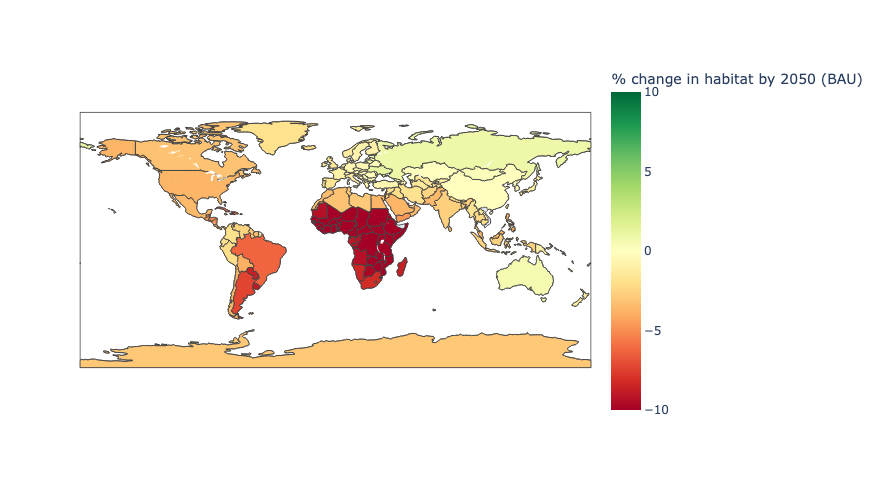

In [109]:
px.choropleth(
    williams_2020_countries, 
    locations="Code", 
    color="bau_habitat_loss_all", 
    hover_name="Entity",  
    range_color=[-10,10],
    height=500,
    color_continuous_scale="RdYlGn",
    color_continuous_midpoint=0,
    labels = {
        "bau_habitat_loss_all": "% change in habitat by 2050 (BAU)"
    }
)

Williams et al. (2020) also looked at other options for meeting demand for food which reduce the need for cropland expansion. Among the options they looked at were changing diets to a less meat intensive diet (the EAT-Lancet diet) and halving food waste. 

Let's make bar plots to compare the effect of closing yield gaps, adopting healthy diets, or halving food waster on cropland expansion.

Note how there is still a large increase in cropland area in Africa under scenarios of adopting healthy diets and halving food waste. Also note how different solutions might be appropriate on different continents.

**Can you edit the below bar plots to use a consistent range of values on the x-axis to aid comparison?**

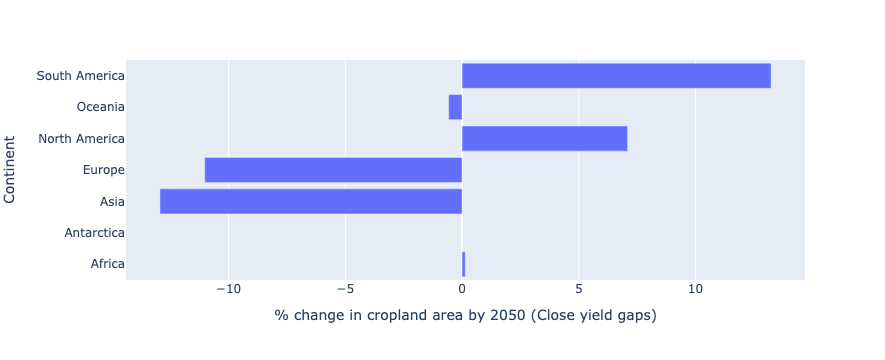

In [110]:
px.bar(
    williams_2020_continents, 
    x="yields_change_pct", 
    y="Continent", 
    labels = {
        "yields_change_pct": "% change in cropland area by 2050 (Close yield gaps)"
    }
)

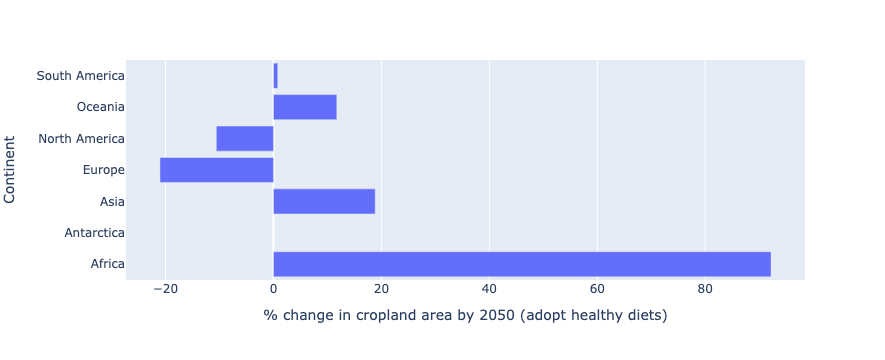

In [111]:
px.bar(
    williams_2020_continents, 
    x="diets_change_pct", 
    y="Continent", 
    labels = {
        "diets_change_pct": "% change in cropland area by 2050 (adopt healthy diets)"
    }
)

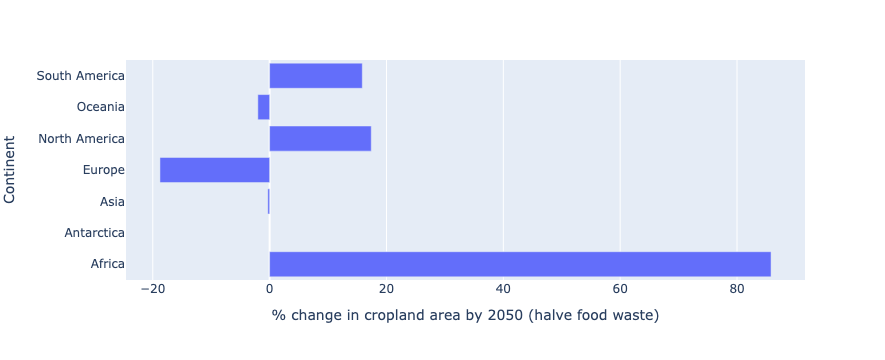

In [112]:
px.bar(
    williams_2020_continents, 
    x="waste_change_pct", 
    y="Continent", 
    labels = {
        "waste_change_pct": "% change in cropland area by 2050 (halve food waste)"
    }
)

## Summary

These exercises demonstrate how we can use data visualisations and animations to combine datasets from a range of subject areas (population, agriculture, biodiversity), explore them, and identify solutions to complex problems. 

Here, these datasets highlight the challenge of meeting food demand while protecting the habitat of many species under business-as-usual agricultural and demographic scenarios. However, visualising this data spatially illustrates how closing crop yield gaps in Africa could realise many benefits simultaneously of meeting food demand, achieving food security and development goals, and protecting habitats from conversion to cropland. 

This exercise also demonstrates the importance of data visualisations as a communication tool (see the Our World in Data article: <a href="https://ourworldindata.org/yields-habitat-loss" target="_blank">*To protect the world’s wildlife we must improve crop yields – especially across Africa*</a> as a good example of this ). Data visualisations can be used to summarise the complexity of big datasets to tell an important story to a range of audiences.

Finally, think about all the datasets used in these exercises: global historical and projected population time-series, global crop yield time-series, data on cropland area, habitats for species, diets, and food waste. These datasets are derived from a range of underlying data sources and models. Considerable skills in (spatial) data processing and analysis are required to generate all these underlying datasets that permit analyses such as that in <a href="https://www.nature.com/articles/s41893-020-00656-5" target="_blank">Williams et al. (2020)</a>. This is where the skills you are learning in this course come in. 

